In [15]:
%matplotlib inline

In [16]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train_set = pd.read_csv("../train_cap2018.csv")
(nrow_default, ncol_default) = train_set.shape
features_list_default = train_set.columns.values[1:ncol_default-1]
features_list_default

array(['sentences', 'words', 'letters.all', 'syllables', 'punct',
       'avg.sentc.length', 'avg.word.length', 'avg.syll.word',
       'sntc.per.word', 'TTR', 'ARI', 'Bormuth', 'Coleman.C1',
       'Coleman.C2', 'Coleman.C3', 'Coleman.C4', 'Coleman.Liau',
       'Dale.Chall', 'Danielson.Bryan.DB1', 'Danielson.Bryan.DB2',
       'Dickes.Steiwer', 'DRP', 'ELF', 'Farr.Jenkins.Paterson', 'Flesch',
       'Flesch.Kincaid', 'FOG', 'FORCAST', 'Fucks', 'Linsear.Write',
       'LIX', 'nWS1', 'nWS2', 'nWS3', 'nWS4', 'RIX', 'SMOG', 'Spache',
       'Strain', 'Traenkle.Bailer.TB1', 'Traenkle.Bailer.TB2', 'TRI',
       'Tuldava', 'Wheeler.Smith', 'text', 'CTTR', 'HD-D (vocd-D)',
       "Herdan's C", 'Maas a', 'Maas lgV0', 'MATTR', 'MSTTR', 'MTLD',
       'Root TTR', 'Summer', 'TTR.1', 'Uber index', "Yule's K"],
      dtype=object)

## Drop string values

In [18]:
df = train_set
df = df.drop('fulltext', axis = 1)

In [19]:
def prepare_data(df):
    df = df.drop('fulltext', axis = 1)
    df = df.drop('MATTR', axis=1)
    df = df.drop('MSTTR', axis=1)
    return df

def split_df_to_data_target(df):
    # Get list of features w/o feature containing string values
    (nrow, ncol) = df.shape
    features = df.columns.values[0:ncol-1]

    # Separating out the features
    x = df.loc[:, features].values

    # Separating out the target
    y = df.loc[:,['level1']].values
    return x,y

def standard_scale_x_data(x):
    return StandardScaler().fit_transform(x)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27310 entries, 0 to 27309
Data columns (total 59 columns):
sentences                27310 non-null int64
words                    27310 non-null int64
letters.all              27310 non-null int64
syllables                27310 non-null int64
punct                    27310 non-null int64
avg.sentc.length         27310 non-null float64
avg.word.length          27310 non-null float64
avg.syll.word            27310 non-null float64
sntc.per.word            27310 non-null float64
TTR                      27310 non-null float64
ARI                      27310 non-null float64
Bormuth                  27310 non-null float64
Coleman.C1               27310 non-null int64
Coleman.C2               27310 non-null int64
Coleman.C3               27310 non-null int64
Coleman.C4               27310 non-null int64
Coleman.Liau             27310 non-null int64
Dale.Chall               27310 non-null float64
Danielson.Bryan.DB1      27310 non-null float64

In [21]:
(nrow, ncol) = df.shape
ncol

59

## Plot correlation

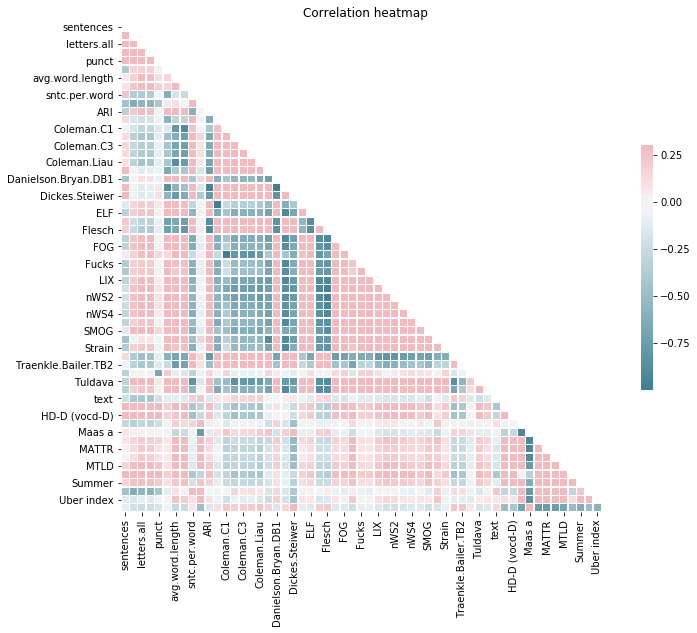

In [22]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set label
ax.set_title('Correlation heatmap')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Checking for NaN values

In [23]:
count_null_df = df.count(axis=0)/nrow
# count_null_df.sort_values(axis=0)
count_null_df = pd.DataFrame({'Column name':count_null_df.index, 'Ratio of non NaN values':count_null_df.values})
count_null_df = count_null_df.sort_values(by=['Ratio of non NaN values'])
count_null_df.head()

,Column name,Ratio of non NaN values
50,MATTR,0.199890
51,MSTTR,0.207763
0,sentences,1.000000
31,nWS1,1.000000
32,nWS2,1.000000


## Dropping MATTR & MSTTR columns

In [24]:
df = df.drop('MATTR', axis=1)
df = df.drop('MSTTR', axis=1)

In [25]:
# Get list of features w/o feature containing string values
(nrow, ncol) = df.shape
features = df.columns.values[0:ncol-1]


# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['level1']].values

In [26]:
df.describe()

,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,TTR,...,HD-D (vocd-D),Herdan's C,Maas a,Maas lgV0,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K
count,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,...,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000,27310.000000
mean,6.178103,69.591578,286.920871,94.919443,13.445405,13.808023,4.068831,1.342988,0.102530,0.723658,...,29.973272,0.919785,0.209477,4.362110,60.654317,5.621359,0.839242,0.723612,25.751004,175.234313
std,3.565665,41.665862,183.019658,60.276153,7.705855,11.104274,0.499349,0.145937,0.061869,0.101662,...,6.041291,0.029880,0.038736,0.985314,29.939369,1.308844,0.097361,0.101676,13.431118,96.680399
min,1.000000,5.000000,21.000000,6.000000,0.000000,1.437500,2.230769,1.000000,0.005435,0.294118,...,4.000000,0.720000,0.060000,1.100000,5.360000,1.770000,-2.510000,0.290000,4.000000,11.340000
25%,4.000000,38.000000,149.000000,49.000000,8.000000,8.000000,3.741098,1.243590,0.064516,0.652174,...,27.382500,0.900000,0.190000,3.730000,39.675000,4.620000,0.810000,0.650000,18.750000,110.190000
50%,6.000000,62.000000,250.000000,83.000000,12.000000,11.000000,4.028037,1.333333,0.090909,0.714286,...,32.000000,0.920000,0.210000,4.310000,55.070000,5.530000,0.860000,0.710000,23.020000,152.000000
75%,8.000000,92.000000,380.000000,125.000000,17.000000,15.500000,4.343750,1.427251,0.125000,0.791667,...,34.220000,0.940000,0.230000,4.840000,75.400000,6.560000,0.890000,0.790000,28.560000,214.500000
max,50.000000,464.000000,2050.000000,654.000000,122.000000,184.000000,9.913043,3.173913,0.695652,0.976190,...,41.000000,0.990000,0.500000,14.230000,493.920000,11.930000,3.510000,0.980000,251.780000,1564.100000


## Standardizing the features

In [27]:
x = StandardScaler().fit_transform(x)

In [28]:
df_x = df[df.columns[:ncol-1]]

In [29]:
df_x = StandardScaler().fit_transform(df_x)

In [30]:
df_x.shape

(27310, 56)

# Split x, y into train and test data

In [31]:
# from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [32]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [33]:
# Cost matrix is given by http://cap2018.litislab.fr/competition_en.pdf
# Lower is better.
def compute_performance_from_confusion_matrix(confusion_matrix):
    cost_matrix = np.array([[0,1,2,3,4,6], [1,0,1,4,5,8],[3,2,0,3,5,8], [10,7,5,0,2,7], [20,16,12,4,0,8], [44,38,32,19,13,0]])
    n = confusion_matrix.sum()
    # Performance E = Dot product of cost matrix and confusion matrix / nb_sample
    performance_E = np.vdot(cost_matrix, confusion_matrix)/n
    return performance_E
def compute_performance_from_predictions(ground_truth, predictions):
    cm = confusion_matrix(np.ravel(ground_truth, order='C'), predictions)
    cost_matrix = np.array([[0,1,2,3,4,6], [1,0,1,4,5,8],[3,2,0,3,5,8], [10,7,5,0,2,7], [20,16,12,4,0,8], [44,38,32,19,13,0]])
    n = cm.sum()
    # Performance E = Dot product of cost matrix and confusion matrix / nb_sample
    performance_E = np.vdot(cost_matrix, cm)/n
    return performance_E

custom_loss = make_scorer(compute_performance_from_predictions, greater_is_better=False)

In [34]:
from sklearn.neural_network import MLPClassifier
from hyperopt import hp

** First run of Neural Net **

In [35]:
clf = MLPClassifier(solver='adam', alpha=1e-5,
...                     hidden_layer_sizes=(39, 23), random_state=1)

In [36]:
clf.fit(X_train, y_train.flatten()) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(39, 23), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [37]:
predictions = clf.predict(X_test)

In [38]:
compute_performance_from_predictions(y_test, predictions)

0.4004100761570006

In [39]:
clf.score(X_test, y_test)

0.8239601640304628

** Let's optimize its parameters **

In [40]:
import theano
theano.config.gcc.cxxflags = "-D_hypot=hypot"

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [41]:

from neupy import layers

In [42]:
def uniform_int(name, lower, upper):
    # `quniform` returns:
    # round(uniform(low, high) / q) * q
    return hp.quniform(name, lower, upper, q=1)

def loguniform_int(name, lower, upper):
    # Do not forget to make a logarithm for the
    # lower and upper bounds.
    return hp.qloguniform(name, np.log(lower), np.log(upper), q=1)

parameter_space = {
    'step': hp.uniform('step', 0.01, 0.5),
    'layers': hp.choice('layers', [{
        'n_layers': 1,
        'n_units_layer': [
            uniform_int('n_units_layer_11', 30, 50),
        ],
    }, {
        'n_layers': 2,
        'n_units_layer': [
            uniform_int('n_units_layer_21', 10, 25),
            uniform_int('n_units_layer_22', 10, 30),
        ],
    }]),
    'act_func_type': hp.choice('act_func_type', [
        layers.Relu,
        layers.PRelu,
        layers.Elu,
        layers.Tanh,
        layers.Sigmoid
    ]),

    'dropout': hp.uniform('dropout', 0, 0.5),
    'batch_size': loguniform_int('batch_size', 16, 100),
}

In [43]:
from pprint import pprint

def train_network(parameters):
    print("Parameters:")
    pprint(parameters)
    print()

In [45]:
step = parameter_space['step']
batch_size = loguniform_int('batch_size', 16, 100)
proba = parameter_space['dropout']
activation_layer = parameter_space['act_func_type']
layer_sizes = [n for n in parameter_space['layers']['n_units_layer']]

MemoryError: 

In [46]:
parameter_space['layers']['n_units_layer']

In [ ]:
import pycuda.gpuarray as gpuarray
import pycuda.driver as cuda

cuda.init()
assert cuda.Device.count() >= 1

dev = cuda.Device(0)
ctx = dev.make_context()

In [ ]:
a_gpu = gpuarray.to_gpu(np.random.randn(4,4).astype(np.float32))
a_doubled = (2*a_gpu).get()
print(a_doubled)
print(a_gpu)

In [47]:
import tensorflow as tf

C:\Users\Minh Tri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [49]:
import tensorflow.contrib.learn as skflow

In [50]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.flatten())
y_test_encoded = label_encoder.fit_transform(y_test.flatten())

onehot_encoder = OneHotEncoder(sparse=False)

y_train_encoded = y_train_encoded.reshape(len(y_train_encoded), 1)
onehot_encoded_y_train = onehot_encoder.fit_transform(y_train_encoded)

y_test_encoded = y_test_encoded.reshape(len(y_test_encoded), 1)
onehot_encoded_y_test = onehot_encoder.fit_transform(y_test_encoded)
# print(integer_encoded)

inverted_y_train = label_encoder.inverse_transform([onehot_encoded_y_train])
inverted_y_train = label_encoder.inverse_transform([argmax(onehot_encoded_y_test)])
print(inverted_y_train)

C:\Users\Minh Tri\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
inverted_y_train

In [51]:
classifier = skflow.DNNClassifier(hidden_units=[45, 25, 15], n_classes=6, feature_columns=[tf.contrib.layers.real_valued_column("", dimension=X_train.shape[1])], optimizer='Adam')
classifier.fit(X_train, y_train_encoded, steps=10000, batch_size=32)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020B0415FF60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Use

InternalError: Blas GEMM launch failed : a.shape=(32, 56), b.shape=(56, 45), m=32, n=45, k=56
	 [[Node: dnn/hiddenlayer_0/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](ToFloat, dnn/hiddenlayer_0/weights/part_0/read)]]

Caused by op 'dnn/hiddenlayer_0/MatMul', defined at:
  File "C:\Users\Minh Tri\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Minh Tri\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Minh Tri\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Minh Tri\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Minh Tri\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Minh Tri\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Minh Tri\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Minh Tri\AppData\Roaming\Python\Python36\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Minh Tri\AppData\Roaming\Python\Python36\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-dc2962c58e15>", line 2, in <module>
    classifier.fit(X_train, y_train_encoded, steps=10000, batch_size=32)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 508, in fit
    SKCompat(self).fit(x, y, batch_size, steps, max_steps, monitors)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 1527, in fit
    monitors=all_monitors)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 524, in fit
    loss = self._train_model(input_fn=input_fn, hooks=hooks)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 1041, in _train_model
    model_fn_ops = self._get_train_ops(features, labels)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 1264, in _get_train_ops
    return self._call_model_fn(features, labels, model_fn_lib.ModeKeys.TRAIN)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 1227, in _call_model_fn
    model_fn_results = self._model_fn(features, labels, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\dnn.py", line 177, in _dnn_model_fn
    scope=hidden_layer_scope)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 183, in func_with_args
    return func(*args, **current_args)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1716, in fully_connected
    outputs = layer.apply(inputs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\layers\base.py", line 828, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\layers\base.py", line 717, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\layers\core.py", line 163, in call
    outputs = gen_math_ops.mat_mul(inputs, self.kernel)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4567, in mat_mul
    name=name)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\Minh Tri\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(32, 56), b.shape=(56, 45), m=32, n=45, k=56
	 [[Node: dnn/hiddenlayer_0/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](ToFloat, dnn/hiddenlayer_0/weights/part_0/read)]]


In [ ]:
tmp = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test_encoded.ravel(), tmp)
print(score)

In [ ]:
tmp


In [ ]:
compute_performance_from_predictions(y_test_encoded.ravel(), tmp)

In [65]:
type(y_test_encoded)

numpy.ndarray

In [66]:
X_train.shape

(20482, 56)

In [2]:
feature_importance = ['words', 'letters.all', 'syllables', 'punct', 'DRP', 'Fucks', 'Wheeler.Smith', 'text', 'MTLD', "Yule's K"]

In [5]:
pd

NameError: name 'pd' is not defined

In [3]:
df_x_feat_imp = df[feature_importance]
df_x_feat_imp = StandardScaler().fit_transform(df_x_feat_imp)
df_list = get_
X_train, X_test, y_train, y_test = train_test_split(df_x_feat_imp, y, random_state = 0)
y_train_encoded = label_encoder.fit_transform(y_train.flatten())
y_test_encoded = label_encoder.fit_transform(y_test.flatten())

NameError: name 'df' is not defined

In [133]:
classifier = skflow.DNNClassifier(hidden_units=[45, 45, 25, 15], n_classes=6, feature_columns=[tf.contrib.layers.real_valued_column("", dimension=X_train.shape[1])])
classifier.fit(X_train, y_train_encoded, steps=10000, batch_size=64)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DDF2906C50>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\MINHTR~1\\AppData\\Local\\Temp\\tmpkedt1m_6'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\MINHTR~1\AppData\Local\Temp\tmpke

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001DDF29067F0>, 'hidden_units': [45, 45, 25, 15], 'feature_columns': (_RealValuedColumn(column_name='', dimension=10, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x000001DC3C06B6A8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [134]:
tmp = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test_encoded, tmp)
print(score)
compute_performance_from_predictions(y_test_encoded, tmp)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MINHTR~1\AppData\Local\Temp\tmpkedt1m_6\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8063854715875806


0.4046572934973638

In [14]:
%save nnet_23-06-18 0-87

The following commands were written to file `nnet_23-06-18.py`:

get_ipython().run_line_magic('load', 'nnet_23-06-18')
feature_importance = ['words', 'letters.all', 'syllables', 'punct', 'DRP', 'Fucks', 'Wheeler.Smith', 'text', 'MTLD', "Yule's K"]
df_x_feat_imp = df[feature_importance]
df_x_feat_imp = StandardScaler().fit_transform(df_x_feat_imp)
X_train, X_test, y_train, y_test = train_test_split(df_x_feat_imp, y, random_state = 0)
y_train_encoded = label_encoder.fit_transform(y_train.flatten())
y_test_encoded = label_encoder.fit_transform(y_test.flatten())
get_ipython().run_line_magic('load', 'nnet_23-06-18')
# get_ipython().run_line_magic('save', 'nnet_23-06-18')
pd
get_ipython().run_line_magic('load', 'nnet_23-06-18.py')
# get_ipython().run_line_magic('save', 'nnet_23-06-18')
pd
get_ipython().run_line_magic('load', 'nnet_23-06-18.py')
# get_ipython().run_line_magic('save', 'nnet_23-06-18')
get_ipython().run_line_magic('load', 'nnet_23_06_18.py')
# get_ipython().run_line_magic('save

In [13]:
# %load nnet_23_06_18.py
get_ipython().run_line_magic('save', 'nnet_23_06_18')


Operation cancelled.


In [10]:
pd

NameError: name 'pd' is not defined